# Chapter 4.1 붓꽃 데이터 회귀

- 회귀모델은 종속변수 (y) 실수형이어야함

In [1]:
# 라이브러리 로딩
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [4]:
# 데이터 분할
## 종속변수가 범주형이 아님으로 데이터 분할 시 stratify 옵션을 주지 않음
y = df['petal width (cm)']
X = df.drop(['petal width (cm)'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [5]:
# 학습 모델1 - 선형회귀 모델
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [9]:
# 학습
lr_model.fit(X_train, y_train)
print('weight:',lr_model.coef_) # coef_ : 추정된 가중치 벡터
print('bias:',lr_model.intercept_) # intercept_ : 추정된 상수항

weight: [-0.24488106  0.24482729  0.53764071]
bias: -0.1491639103657194


In [12]:
# 평가
score = lr_model.score(X_test, y_test)
print('선형회귀 모델 R2: {0:2f}'.format(score))

선형회귀 모델 R2: 0.936867


<Axes: >

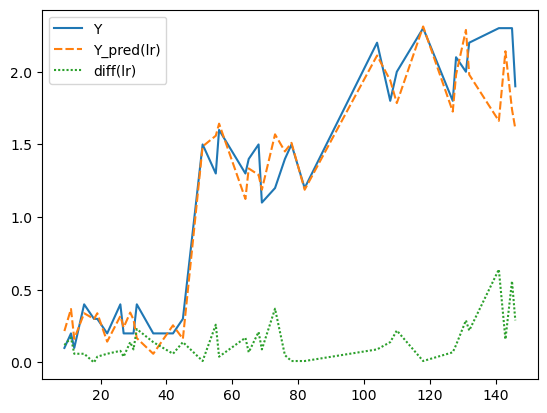

In [14]:
# 예측 결과 시각화 
y_pred = lr_model.predict(X_test)
lr_df = pd.DataFrame(data = {'Y':y_test, 'Y_pred(lr)':y_pred, 'diff(lr)':np.round(np.abs(y_test - y_pred),2)})
sns.lineplot(data = lr_df)

In [15]:
from sklearn.tree import DecisionTreeRegressor

# 학습 - DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state = 42)
tree_model.fit(X_train, y_train)

# 평가
score = tree_model.score(X_test, y_test)
print('의사결정나무 R2: {0:.2f}'.format(score))

의사결정나무 R2: 0.87


In [17]:
# 예측 결과
y_pred = tree_model.predict(X_test)
tree_df = pd.DataFrame(data = {'Y':y_test, 'Y_pred(tree)': y_pred, 'diff(tree)': np.round(np.abs(y_test-y_pred),2)})
tree_df.sort_values(by = ['diff(tree)'],ascending = False).head(10)

,Y,Y_pred(tree),diff(tree)
118,2.3,1.4,0.9
141,2.3,1.5,0.8
143,2.3,1.8,0.5
132,2.2,1.8,0.4
146,1.9,1.5,0.4
104,2.2,1.8,0.4
110,2.0,1.7,0.3
108,1.8,1.5,0.3
128,2.1,1.8,0.3
73,1.2,1.5,0.3


<Axes: >

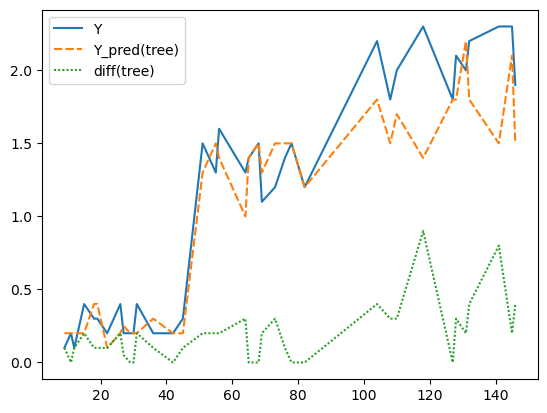

In [18]:
sns.lineplot(data = tree_df)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

forest_model = RandomForestRegressor(n_estimators = 100,random_state=42)
lgb_model = LGBMRegressor(n_estimators = 100,random_state = 42)
xgb_model = XGBRegressor(n_estimators = 100,random_state = 42)

model_list = [forest_model, lgb_model, xgb_model]

for model in model_list:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 모델 R2: {1:.2f}'.format(model_name, score))

RandomForestRegressor 모델 R2: 0.94
LGBMRegressor 모델 R2: 0.95
XGBRegressor 모델 R2: 0.92


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE :{0:.3f}, RMSE : {1:3f}, r2 :{2:.3f}'.format(mse,rmse,r2))

In [24]:
model_list = [lr_model, tree_model, forest_model, lgb_model, xgb_model]

for model in model_list:
    y_preds = model.predict(X_test)
    print('{0} 모델'.format(model.__class__.__name__))
    printRegressorResult(y_test,y_preds)

LinearRegression 모델
MSE :0.040, RMSE : 0.201233, r2 :0.937
DecisionTreeRegressor 모델
MSE :0.081, RMSE : 0.284351, r2 :0.874
RandomForestRegressor 모델
MSE :0.041, RMSE : 0.203563, r2 :0.935
LGBMRegressor 모델
MSE :0.031, RMSE : 0.176100, r2 :0.952
XGBRegressor 모델
MSE :0.052, RMSE : 0.228002, r2 :0.919
